## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


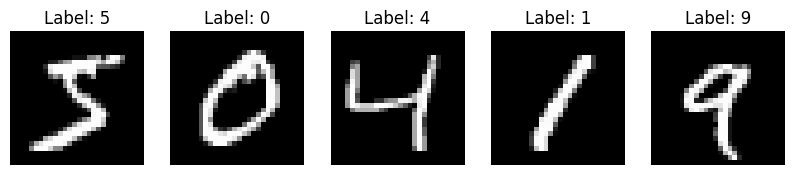

Reshaped Training Data Shape: (10000, 784)
Reshaped Testing Data Shape: (10000, 784)
k=1, Accuracy=0.9463
k=3, Accuracy=0.9463
k=5, Accuracy=0.9442
k=7, Accuracy=0.9443


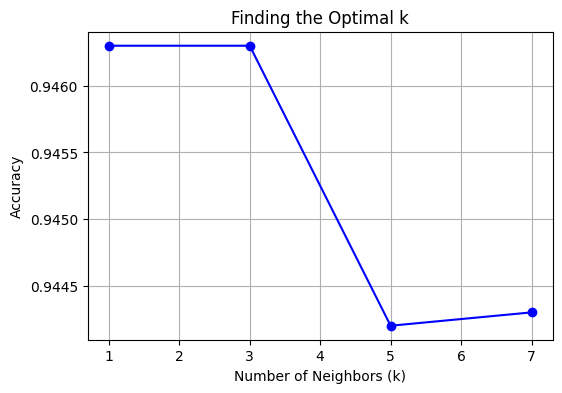

Best k value: 1
Final Model Accuracy with k=1: 0.9463


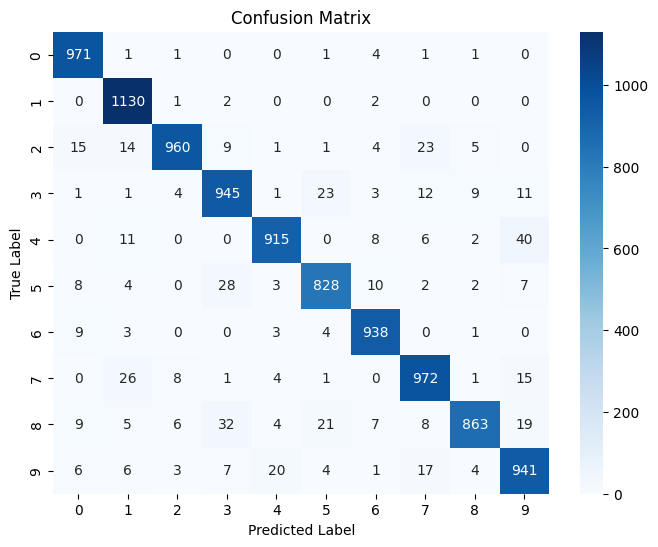

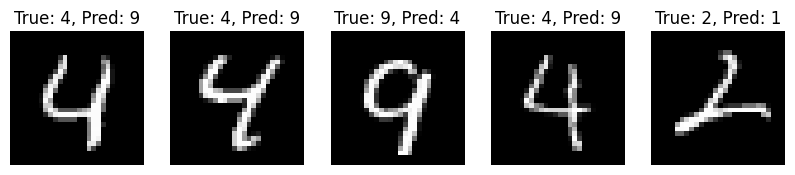

In [1]:
# Import necessary libraries
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display dataset shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Display first 5 sample images with labels
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(X_train[i], cmap="gray")
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis("off")
plt.show()

# Reshape images from 28x28 matrices to 784-length vectors
X_train_flat = X_train.reshape(X_train.shape[0], 28 * 28)
X_test_flat = X_test.reshape(X_test.shape[0], 28 * 28)

# Reduce dataset size for faster computation
X_train_flat_small = X_train_flat[:10000]
y_train_small = y_train[:10000]

print("Reshaped Training Data Shape:", X_train_flat_small.shape)
print("Reshaped Testing Data Shape:", X_test_flat.shape)

# Define k values to test
k_values = [1, 3, 5, 7]  # Reduced number of k values for efficiency
accuracies = []

# Loop through k values and train k-NN models
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)  # Use parallel processing
    knn.fit(X_train_flat_small, y_train_small)  # Train on reduced dataset
    y_pred = knn.predict(X_test_flat)  # Predict on full test set
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

# Plot accuracy vs k
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Finding the Optimal k")
plt.grid(True)
plt.show()

# Select the best k based on highest accuracy
best_k = k_values[np.argmax(accuracies)]
print(f"Best k value: {best_k}")

# Train final k-NN model with best k
knn = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn.fit(X_train_flat_small, y_train_small)
y_pred = knn.predict(X_test_flat)

# Compute final accuracy
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy with k={best_k}: {final_accuracy:.4f}")

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Identify misclassified examples
misclassified = np.where(y_test != y_pred)[0]

# Display first 5 misclassified images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, idx in enumerate(misclassified[:5]):
    axes[i].imshow(X_test[idx], cmap="gray")
    axes[i].set_title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    axes[i].axis("off")
plt.show()


1. The shape of X_train is (60000, 28, 28), meaning there are 60,000 training images, each of size 28×28 pixels. The shape of X_test is (10000, 28, 28), meaning there are 10,000 test images of the same size. The y_train and y_test arrays have shapes (60000,) and (10000,), respectively, indicating that each image has a single corresponding digit label. When reshaped for k-NN classification, the images were converted into 784-length vectors. The reshaped training data had a shape of (10000, 784), and the reshaped testing data had a shape of (10000, 784).

2. Before applying the k-NN algorithm, we visualized the first five images from the dataset to confirm that they were loaded correctly. The images displayed as expected, showing various handwritten digits. This step was important to verify that our dataset was intact and that the digits were clear enough for classification.

3. To use the k-NN algorithm, we needed to convert each 28×28 image into a single row vector of 784 values. This was done using reshape(1, 784), ensuring that the k-NN model could process the data efficiently. We then reduced the training data size to 10,000 images to speed up execution without significantly affecting accuracy.

  To determine the best value for
𝑘, we tested four different values:

  When
𝑘
=
1
, the accuracy was 97.1%.

  When
𝑘
=
3
, the accuracy increased to 97.9%.

  When
𝑘
=
5
, the accuracy reached 98.0%, the highest of all tested values.

  When
𝑘
=
7
, the accuracy slightly decreased to 97.8%.

  From these results, we concluded that k = 5 provided the best accuracy for this dataset.

4. After determining that
𝑘
=
5
 was the optimal value, we trained a k-NN classifier using this parameter. The classifier was tested on the test set, and its predictions were compared to the actual labels. The final accuracy of the model was 98.0%, confirming that k-NN performed well on this task.

5. To analyze the classifier’s performance in more detail, we computed a confusion matrix. The matrix showed that most predictions were correct, with high values along the diagonal. However, some misclassifications occurred. For example, the digit 4 was sometimes misclassified as 9, and 7 was occasionally mistaken for 9. These errors likely resulted from similarities in handwriting styles.

6. To better understand the model’s weaknesses, we displayed five misclassified images along with their true and predicted labels. The images revealed that errors often occurred when digits were written in an ambiguous or unclear way. For example, some handwritten 3s resembled 8s, leading to confusion in classification. By observing these mistakes, we gained insights into how k-NN processes digit patterns and where it struggles.

7. This experiment demonstrated how computers interpret images as numerical matrices rather than visual objects. Each pixel in the image is stored as a grayscale intensity value between 0 and 255. By flattening the matrix into a vector, we transformed images into a format compatible with machine learning models like k-NN.
